In [1]:
import pandas as pd

In [4]:
MAX_model = pd.read_csv("models/opti_model_0.csv")

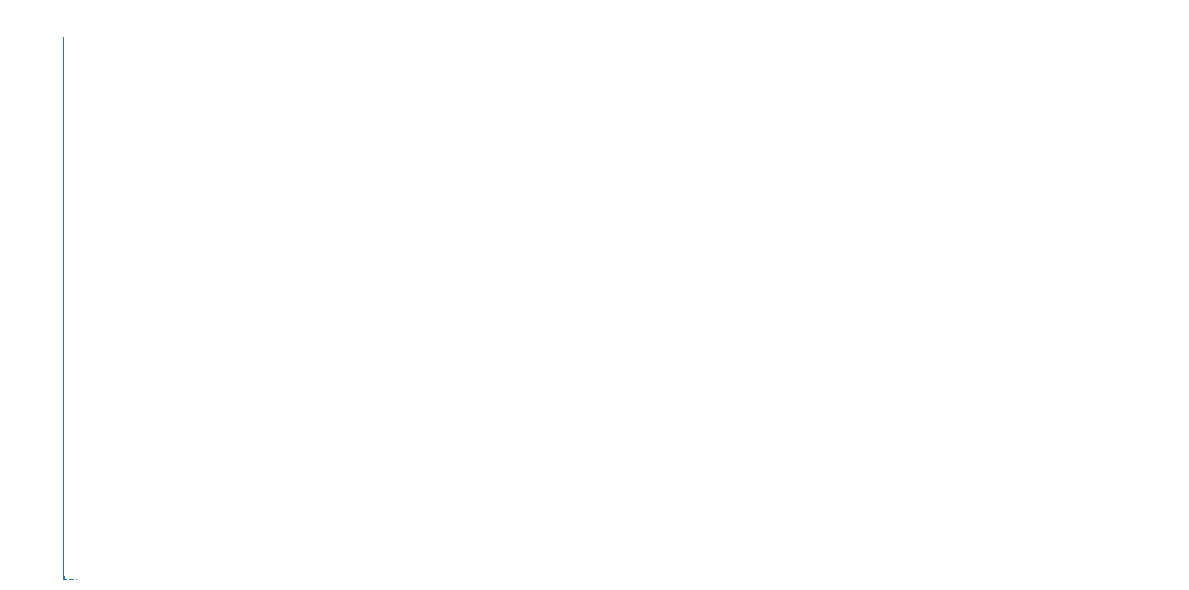

In [9]:
import matplotlib.pyplot as plt

changes = []

# Loop over the slices
for i in range(8759):
    slice = MAX_model[MAX_model["hour"] == i]
    real_slice = list(slice["Real"])
    predicted_slice = list(slice["Assigned"])
    diff = [predicted_slice[j] - real_slice[j] for j in range(len(real_slice))]

    if str(diff) in changes:
        changes[str(diff)] += 1
    else:
        changes[str(diff)] = 1

# Sort the changes based on their counts in descending order
sorted_changes = sorted(changes.items(), key=lambda x: x[1], reverse=True)

# Extract the difference arrays and their counts
diff_arrays, counts = zip(*sorted_changes)

# Generate a bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(diff_arrays)), counts)
plt.xticks([])
plt.yticks([])
plt.box(False)
plt.tight_layout()

# Show the plot
plt.show()
